In [1]:
!ls

README.md        main.ipynb       src
data             requirements.txt thrash


In [2]:
import torch
from matplotlib import pyplot as plt
from src.rl_algorithm.dqn.DQN_Agent import DQNAgent
import gym
from collections import deque
import numpy as np
from gym.wrappers import RecordVideo
import src.util as util

In [3]:
action_space = [
    (-1, 1, 0.2), (0, 1, 0.2), (1, 1, 0.2), #           Action Space Structure
    (-1, 1,   0), (0, 1,   0), (1, 1,   0), #        (Steering Wheel, Gas, Break)
    (-1, 0, 0.2), (0, 0, 0.2), (1, 0, 0.2), # Range        -1~1       0~1   0~1
    (-1, 0,   0), (0, 0,   0), (1, 0,   0)
]
print(">> Number of actions", len(action_space))

>> Number of actions 12


In [5]:
agent = DQNAgent(action_space=action_space)

In [6]:
env = gym.make('CarRacing-v2', render_mode="human")  # , render_mode='human')

# drunk policy
MAX_STEP = 1000
env.reset()
for step in range(MAX_STEP):
    action = agent.act(is_only_random=True)
    next_state, r, epi_done, info, _ = env.step(action)
env.close()

10 (0, 0, 0)
11 (1, 0, 0)
4 (0, 1, 0)
2 (1, 1, 0.2)
5 (1, 1, 0)
5 (1, 1, 0)
9 (-1, 0, 0)
11 (1, 0, 0)
6 (-1, 0, 0.2)
11 (1, 0, 0)


/Users/matteoprata/opt/anaconda3/envs/rl_course/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


7 (0, 0, 0.2)
1 (0, 1, 0.2)
9 (-1, 0, 0)
0 (-1, 1, 0.2)
0 (-1, 1, 0.2)
7 (0, 0, 0.2)
11 (1, 0, 0)
5 (1, 1, 0)
8 (1, 0, 0.2)
3 (-1, 1, 0)
7 (0, 0, 0.2)
8 (1, 0, 0.2)
7 (0, 0, 0.2)
8 (1, 0, 0.2)
11 (1, 0, 0)
1 (0, 1, 0.2)
5 (1, 1, 0)
3 (-1, 1, 0)
11 (1, 0, 0)
3 (-1, 1, 0)
4 (0, 1, 0)
0 (-1, 1, 0.2)
11 (1, 0, 0)
9 (-1, 0, 0)
3 (-1, 1, 0)
6 (-1, 0, 0.2)
3 (-1, 1, 0)
3 (-1, 1, 0)
11 (1, 0, 0)
2 (1, 1, 0.2)
1 (0, 1, 0.2)
1 (0, 1, 0.2)
4 (0, 1, 0)
10 (0, 0, 0)
6 (-1, 0, 0.2)
7 (0, 0, 0.2)
2 (1, 1, 0.2)
5 (1, 1, 0)
5 (1, 1, 0)
0 (-1, 1, 0.2)
2 (1, 1, 0.2)
8 (1, 0, 0.2)
11 (1, 0, 0)
0 (-1, 1, 0.2)
0 (-1, 1, 0.2)
8 (1, 0, 0.2)
3 (-1, 1, 0)
11 (1, 0, 0)
7 (0, 0, 0.2)
7 (0, 0, 0.2)
4 (0, 1, 0)
2 (1, 1, 0.2)
8 (1, 0, 0.2)
7 (0, 0, 0.2)
1 (0, 1, 0.2)
0 (-1, 1, 0.2)
4 (0, 1, 0)
4 (0, 1, 0)
6 (-1, 0, 0.2)
9 (-1, 0, 0)
1 (0, 1, 0.2)
0 (-1, 1, 0.2)
8 (1, 0, 0.2)
8 (1, 0, 0.2)
5 (1, 1, 0)
9 (-1, 0, 0)
6 (-1, 0, 0.2)
11 (1, 0, 0)
6 (-1, 0, 0.2)
5 (1, 1, 0)
3 (-1, 1, 0)
9 (-1, 0, 0)
5 (1, 1, 0)
7 (0, 0, 0.

In [6]:
util.seed_everything()
PATH_ROOT = util.make_all_paths(is_dynamic_root=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('>> Using device:', device)

>> Created dir data/rl_class_11-25-2023_15-35-32/models
>> Created dir data/rl_class_11-25-2023_15-35-32/plots
>> Created dir data/rl_class_11-25-2023_15-35-32/videos
>> Using device: cpu


In [7]:
STARTING_EPISODE = 1
ENDING_EPISODE = 1000
SKIP_FRAMES = 5
TRAINING_BATCH_SIZE = 64
UPDATE_TARGET_MODEL_FREQUENCY = 10
N_FRAMES = 4

In [8]:
agent = DQNAgent(frames=N_FRAMES, device=device, action_space=action_space)

In [9]:
env = gym.make('CarRacing-v2', render_mode="rgb_array")  # , render_mode='human')
env = RecordVideo(env, PATH_ROOT + 'video', episode_trigger=lambda x: x % UPDATE_TARGET_MODEL_FREQUENCY == 0)
env = gym.wrappers.RecordEpisodeStatistics(env)

In [10]:
# episode stats
epi_total_rewards = []

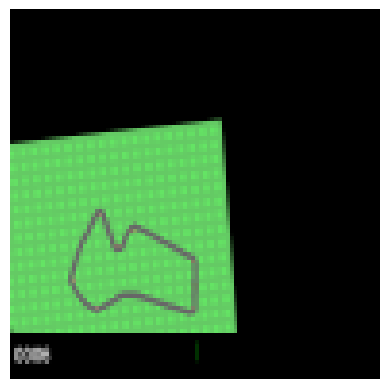

In [11]:
init_state = env.reset()[0]  # 96, 96, 3 pixels image RGB
util.plot_frame_car(init_state)

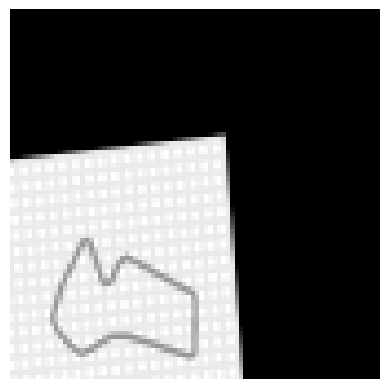

In [12]:
init_state = util.preprocess_frame_car(init_state)  # 96, 96 pixels image GRAY
util.plot_frame_car(init_state)

In [ ]:
for e in range(STARTING_EPISODE, ENDING_EPISODE + 1):
    env.episode_id = e

    init_state = env.reset()[0]                         # 96, 96, 3 pixels image RGB
    init_state = util.preprocess_frame_car(init_state)  # 96, 96 pixels image GRAY
    # show_image(init_state)

    epi_total_reward = 0
    epi_negative_reward_counter = 0
    epi_time_frame_counter = 1
    epi_done = False
        
    # S0 
    state_queue = deque([init_state] * N_FRAMES, maxlen=N_FRAMES)
    state_tensor = torch.Tensor(state_queue).unsqueeze(0).to(device) 
    # util.plot_state_car(np.array(state_queue))  # visualize S0
    
    while True:
        action = agent.act(state_tensor)
        
        # execute action for several steps
        reward = 0
        for _ in range(SKIP_FRAMES):
            # execute action 
            next_state, r, epi_done, info, _ = env.step(action)
            reward += r
            if epi_done:
                break

        # if getting negative reward 10 times after the tolerance steps, terminate this episode
        
        if epi_time_frame_counter > 100 and reward < 0:
            epi_negative_reward_counter += 1 
        else:
            epi_negative_reward_counter = 0
            
        # extra bonus for the model if it uses full gas
        if action[1] == 1 and action[2] == 0:
            reward *= 1.5

        epi_total_reward += reward
        
        # S'
        next_state = util.preprocess_frame_car(next_state)
        next_state_queue = deque(state_queue, maxlen=N_FRAMES) # creates a new queue
        next_state_queue.append(next_state)
        next_state_tensor = torch.Tensor(next_state_queue).unsqueeze(0).to(device)  
        
        # Memorizing saving state, action reward tuples 
        agent.memorize(state_tensor, action, reward, next_state_tensor, epi_done)
        
        # S = S'
        state_queue = next_state_queue
        
        # early stop if the number of 
        if epi_negative_reward_counter >= 25 or epi_total_reward < 0:
            break
        
        # train the model with tuple, if there are enough tuples
        if len(agent.memory) > TRAINING_BATCH_SIZE:  
            agent.replay(TRAINING_BATCH_SIZE)

        epi_time_frame_counter += 1
    epi_total_rewards += [epi_total_reward]
    
    # print stats
    stats_string = 'Episode: {}/{}, Scores(Time Frames): {}, Total Rewards: {:.2}, Epsilon: {:.2}'
    print(stats_string.format(
          e,
          ENDING_EPISODE,
          epi_time_frame_counter,
          float(epi_total_reward),
          float(agent.epsilon))
    )
    
    if e % UPDATE_TARGET_MODEL_FREQUENCY == 0:
        
        # plot rewards stats 
        plt.plot(epi_total_rewards, label="cum rew", color="blue")
        plt.title("Rewards during episode episode")
        plt.savefig(PATH_ROOT + 'plots/reward_{}.pdf'.format(e))
        
        # save model frequently 
        agent.save_model(PATH_ROOT + 'models/trial_{}.h5'.format(e))
    
        # swap model 
        agent.update_target_model()
    env.close()

/var/folders/dd/rff3hk2d6p79x89xcscm2zdm0000gn/T/ipykernel_93520/3015886017.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  state_tensor = torch.Tensor(state_queue).unsqueeze(0).to(device)
/Users/matteoprata/opt/anaconda3/envs/rl_course/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1/1000, Scores(Time Frames): 41, Total Rewards: -0.42, Epsilon: 1.0
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
Episode: 2/1000, Scores(Time Frames): 25, Total Rewards: -0.013, Epsilon: 1.0
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
Episode: 3/1000, Scores(Time Frames): 115, Total Rewards: -0.31, Epsilon: 0.99
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
Episode: 4/1000, Scores(Time Frames): 45, Total Rewards: -0.07, Epsilon: 0.98
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
Episode: 5/1000, Scores(Time Frames): 93, Total Rewards: -0.12, Epsilon: 0.98
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(2)
predicted action tensor(2)
predicted action tensor(2)
predicted action tensor(2)
predicted action tensor(2)
predicted action tensor(2)
predicted action tensor(2)
Episode: 6/1000, Scores(Time Frames): 125, Total Rewards: 2.4e+01, Epsilon: 0.96
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(2)
Episode: 7/1000, Scores(Time Frames): 67, Total Rewards: -0.17, Epsilon: 0.96
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(2)
predicted action tensor(2)
Episode: 8/1000, Scores(Time Frames): 57, Total Rewards: -0.43, Epsilon: 0.95
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
Episode: 9/1000, Scores(Time Frames): 125, Total Rewards: 4.8e+01, Epsilon: 0.94
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
predicted action tensor(7)
Episode: 10/1000, Scores(Time Frames): 93, Total Rewards: -0.45, Epsilon: 0.93
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
Episode: 11/1000, Scores(Time Frames): 84, Total Rewards: -0.47, Epsilon: 0.92
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
Episode: 12/1000, Scores(Time Frames): 120, Total Rewards: -0.74, Epsilon: 0.91
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
Episode: 13/1000, Scores(Time Frames): 87, Total Rewards: -0.32, Epsilon: 0.9
Moviepy - Building video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4


Moviepy - Done !
Moviepy - video ready /Users/matteoprata/PycharmProjects/RL23/data/rl_class_11-25-2023_15-35-32/video/rl-video-episode-0.mp4
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
predicted action tensor(3)
